# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Face Recognition</h2>

<h5 style="margin-top:5px;">In this lesson, we will implement Face Recognitions using the python library face-recognition.</h5>

<p style="margin-top:0;">
1️⃣ Install face-recognition <br>
2️⃣ Check facial similarity <br>
3️⃣ Recognize Faces in an image <br>
</p>

In [1]:
!pip install face_recognition_models
!pip install dlib
!pip install face-recognition

### **2. Check Facial Similarity between two Faces** ##

In [2]:
import cv2
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden.jpg
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/biden2.jpg

--2026-01-18 22:43:57--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/trump.jpg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg [following]
--2026-01-18 22:43:57--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/trump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13791 (13K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>]  13.47K  --.-KB/s    in 0s      

2026-01-18 22:43:57 (169 MB/s) - ‘trump.jpg’ saved [13791/13791]

--2026-01-18 22:43:57--  https://gith

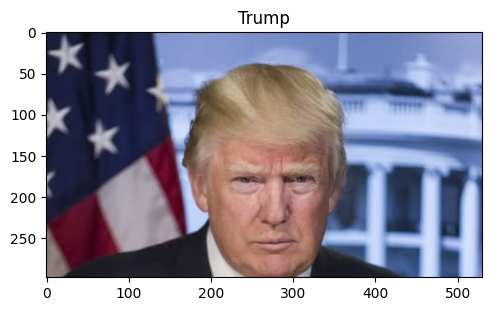

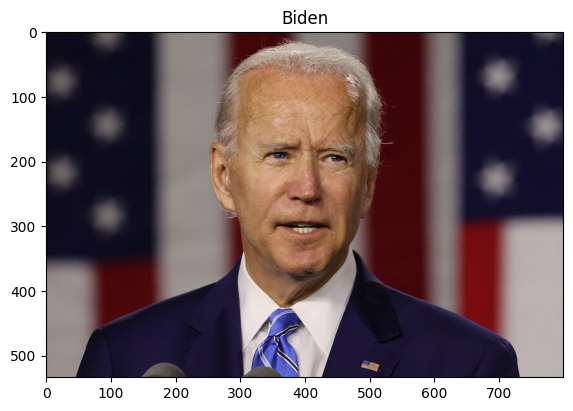

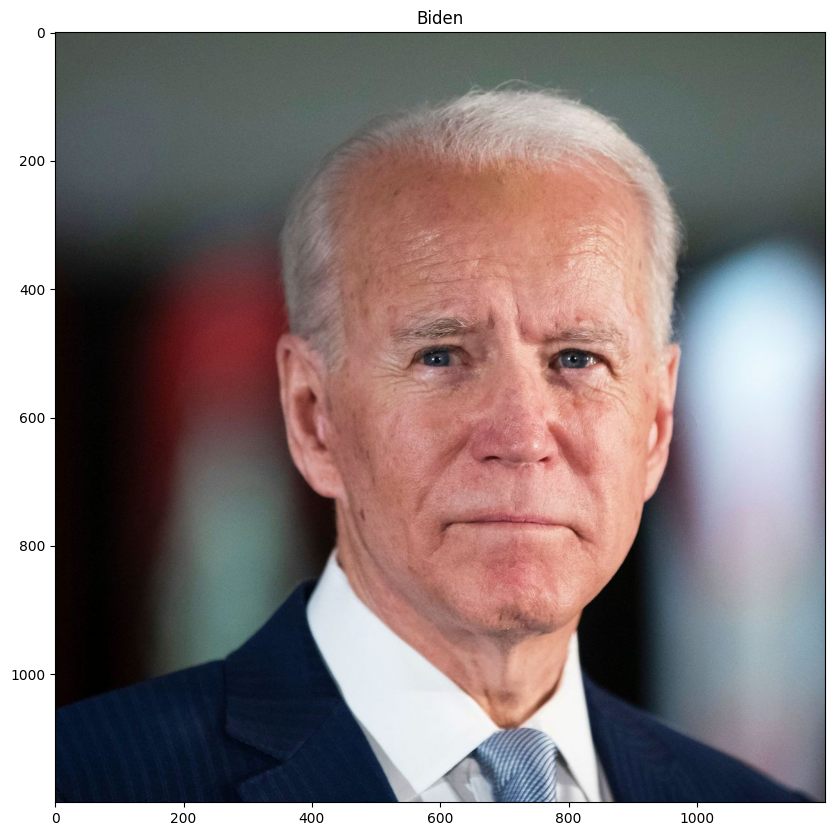

In [3]:
import cv2
from matplotlib import pyplot as plt 

biden = cv2.imread('../images/biden.jpg')
biden2 = cv2.imread('../images/biden2.jpg')
trump = cv2.imread('../images/trump.jpg')

imshow('Trump', trump)
imshow('Biden', biden)
imshow('Biden', biden2)

### **Now let's try it with the above two images** ###

In [4]:
import face_recognition

known_image = face_recognition.load_image_file("../images/biden.jpg")
unknown_image = face_recognition.load_image_file("../images/trump.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

/home/robin/Self-learning/Tutorialspoint_Artificial_Intelligence_and_Machine_Learning_Certification_2026/Module_4_Modern_Computer_Vision/OpenCV/.venv/lib/python3.12/site-packages/face_recognition_models/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


Face Match is False


### **Now let's try it with the two Biden images** ###

In [5]:
import face_recognition

known_image = face_recognition.load_image_file("../images/biden.jpg")
unknown_image = face_recognition.load_image_file("../images/biden2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

result = face_recognition.compare_faces([biden_encoding], unknown_encoding)
print(f'Face Match is {result[0]}')

Face Match is True


### **3. Recognize Faces in an image** ###

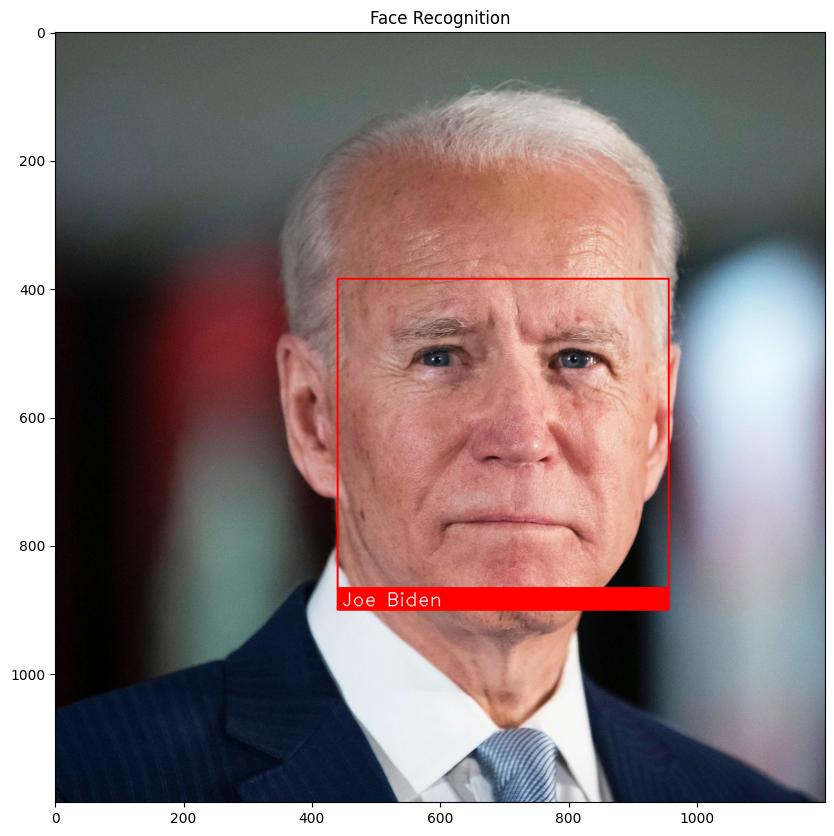

In [6]:
import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt 

# Load a sample picture and learn how to recognize it.
trump_image = face_recognition.load_image_file("../images/trump.jpg")
trump_face_encoding = face_recognition.face_encodings(trump_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("../images/biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    trump_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Donald Trump",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

# Grab a single frame of video
frame = cv2.imread("../images/biden2.jpg")

# Resize frame of video to 1/4 size for faster face recognition processing
small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

# Convert the image from BGR colour (which OpenCV uses) to RGB colour (which face_recognition uses)
rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

# Only process every other frame or video to save time
if process_this_frame:
    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unkwnown"

        # # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Scale back up face locations since the frame we detected in was scaled to 1/4 size
    top *= 4
    right *= 4
    bottom *= 4
    left *= 4

    # Draw a box around the face
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

    # Draw a label with a name below the face
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image
imshow('Face Recognition', frame)